## Media Campaign Cost Prediction

### Define the Problem

Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise system.
Food Mart was the nation's third-largest chain of convenience stores as of 1988.
The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.
Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.

Devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.

[<img src="https://d1csarkz8obe9u.cloudfront.net/posterpreviews/grocery-store-logo-design-template-26efc5e6e40131b8138308aed1bb075b_screen.jpg?ts=1599902810">]()


### Gather the Data

The dataset is given to us via Kaggle
https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction

### Import Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))


import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}".format(matplotlib.__version__))


#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 1.5.3
NumPy version: 1.24.2
SciPy version: 1.10.1
IPython version: 8.11.0
scikit-learn version: 1.2.2
matplotlib version: 3.7.1
-------------------------


### Load Data Modelling Libraries

In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import seaborn as sns
print("seaborn: {}". format(sns.__version__))

from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 12,8

print("Imported")

seaborn: 0.12.2
Imported


### Meet and Greet Data

Get to know your data, 
- What does it look like (datatype and values), 
- What makes it tick (independent/feature variables(s)), 
- What's its goals in life (dependent/target variable(s)).


### Dataset Description I

- store_sales(in millions) - store_sales(in million dollars)
- unit_sales(in millions) - unit_sales(in millions) in stores Quantity
- Total_children - TOTAL CHILDREN IN HOME
- avg_cars_at home(approx) - avg_cars_at home(approx) 
- Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
- Gross_weight - gross_weight OF ITEM
- Recyclable_package - FOOD ITEM IS recyclable_package
- Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
- Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
- Store_sqft - STORE AREA AVAILABLE IN SQFT
- Coffee_bar - COFFEE BAR available in store
- Video_store - VIDEO STORE/gaming store available
- Salad_bar - SALAD BAR available in store
- Prepared_food - food prepared available in store
- Florist - flower shelves available in store
- Cost - COST ON ACQUIRING A CUSTOMERS in dollars

### Dataset Description II

To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick overview of variable datatypes (i.e. qualitative vs quantitative)

- The `Cost` variable is our outcome or `Dependent Variable`. The variable "cost" is always rounded to 2 decimal places, and that's why it cannot take all possible values in an interval, so this technically should be discrete. But if you measure it accurately it should be treated as continuous. A continuous random variable can take all values in an interval, while discrete variable can only take countable values.

### Observing the shape(rows, columns) of our datasets

In [4]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_train = pd.read_csv('/Users/richeyjay/Desktop/MediaCampaignCostPredictionML/env/Code/train_dataset.csv')
print("Shape of raw train data:")
print(data_train.shape)
print('-'*50)
#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_test  = pd.read_csv('/Users/richeyjay/Desktop/MediaCampaignCostPredictionML/env/Code/test_dataset.csv')
print("Shape of test data:")
print(data_test.shape)
print('-'*50)



Shape of raw train data:
(51363, 16)
--------------------------------------------------
Shape of test data:
(9065, 15)
--------------------------------------------------


### Observing Our columns and Unique values in the dataset

In [5]:
cols = data_train.columns.to_list()
print(cols)
data_train[cols].nunique()

['store_sales(in millions)', 'unit_sales(in millions)', 'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']


store_sales(in millions)      1030
unit_sales(in millions)          6
total_children                   6
num_children_at_home             6
avg_cars_at home(approx).1       5
gross_weight                   376
recyclable_package               2
low_fat                          2
units_per_case                  36
store_sqft                      20
coffee_bar                       2
video_store                      2
salad_bar                        2
prepared_food                    2
florist                          2
cost                           328
dtype: int64

#### Observations:

Here we see we have total of `16 Columns` 

We have `15 Independent Features` and `1 Dependent Feature` which is the `Cost` feature

There are 11 `Categorical Features`:

If we look a step further we can divide these 11 Categorical Features even further, by differentiating between Binary(1s & 0s) and Ordinal Features()


`Binary Features`:

- recyclable_package
- low_fat
- coffee_bar
- video_store
- salad_bar
- prepared_food
- florist 

`Ordinal data` has a natural ordering where a number is present in some kind of order by their position on the scale. Ordinal data is `qualitative` data for which their values have some kind of relative position. These kinds of data can be considered “in-between” qualitative and quantitative data.

- unit_sales(in millions)
- total_children
- num_children_at_home
- avg_cars_at home(approx).1


There are 5 `Numerical Features`:

Continuous data is in the form of fractional numbers. Continuous data represents information that can be divided into smaller levels. The continuous variable can take any value within a range. 

These five Features are Continuous:

- store_sales(in millions)
- units_per_case
- gross_weight
- store_sqft
- Cost 


In [6]:

#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data_train_copy = data_train.copy(deep = True)


#preview data
print(data_train_copy.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_train.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_train.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
print('-'*50)

data_train_copy.sample(15) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51363 entries, 0 to 51362
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    51363 non-null  float64
 1   unit_sales(in millions)     51363 non-null  float64
 2   total_children              51363 non-null  float64
 3   num_children_at_home        51363 non-null  float64
 4   avg_cars_at home(approx).1  51363 non-null  float64
 5   gross_weight                51363 non-null  float64
 6   recyclable_package          51363 non-null  float64
 7   low_fat                     51363 non-null  float64
 8   units_per_case              51363 non-null  float64
 9   store_sqft                  51363 non-null  float64
 10  coffee_bar                  51363 non-null  float64
 11  video_store                 51363 non-null  float64
 12  salad_bar                   51363 non-null  float64
 13  prepared_food               513

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
32127,8.58,3.0,5.0,3.0,4.0,18.90,0.0,0.0,33.0,21215.0,1.0,0.0,0.0,0.0,0.0,138.53
44515,6.26,2.0,4.0,0.0,2.0,19.30,1.0,0.0,29.0,30797.0,1.0,1.0,1.0,1.0,1.0,99.38
20516,5.16,3.0,4.0,0.0,1.0,18.60,1.0,0.0,27.0,21215.0,1.0,0.0,0.0,0.0,0.0,69.63
9098,3.56,2.0,0.0,0.0,2.0,13.40,1.0,0.0,25.0,27694.0,1.0,1.0,1.0,1.0,1.0,80.29
47197,6.78,2.0,5.0,3.0,3.0,6.72,0.0,1.0,4.0,23759.0,1.0,0.0,1.0,1.0,1.0,121.93
39238,6.24,4.0,1.0,1.0,2.0,21.90,1.0,1.0,31.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
5773,7.35,3.0,4.0,4.0,3.0,6.11,1.0,0.0,29.0,20319.0,0.0,0.0,0.0,0.0,0.0,53.01
35012,2.28,3.0,4.0,0.0,3.0,11.40,0.0,1.0,4.0,30797.0,1.0,1.0,1.0,1.0,1.0,98.81
40213,4.62,3.0,3.0,2.0,2.0,8.44,0.0,1.0,16.0,30584.0,1.0,1.0,1.0,1.0,1.0,94.79
30326,7.95,3.0,5.0,5.0,3.0,21.70,1.0,0.0,28.0,28206.0,1.0,0.0,0.0,0.0,0.0,109.03


In [7]:
print(data_train_copy.head(5))

   store_sales(in millions)  unit_sales(in millions)  total_children  \
0                      2.68                      2.0             1.0   
1                      5.73                      3.0             5.0   
2                      2.62                      2.0             1.0   
3                     11.73                      3.0             1.0   
4                      4.82                      2.0             1.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   0.0                         2.0          6.30   
1                   5.0                         3.0         18.70   
2                   1.0                         1.0          9.21   
3                   1.0                         3.0         10.90   
4                   1.0                         3.0          8.15   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 1.0      0.0            22.0     30584.0         1.0   
1   

In [8]:
print(data_test.head(5))

   store_sales(in millions)  unit_sales(in millions)  total_children  \
0                      2.65                      5.0             4.0   
1                      8.34                      3.0             0.0   
2                      3.54                      2.0             4.0   
3                      5.60                      2.0             3.0   
4                      4.80                      3.0             2.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   1.0                         4.0          6.89   
1                   0.0                         1.0          9.71   
2                   0.0                         2.0         20.90   
3                   2.0                         2.0         11.00   
4                   0.0                         4.0         17.40   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 0.0      1.0             5.0     33858.0         1.0   
1   

### Checking for Null values

In [9]:
print('Train columns with null values:\n', data_train_copy.isnull().sum())
print("-"*50)


Train columns with null values:
 store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64
--------------------------------------------------


In [10]:
print('Test/Validation columns with null values:\n', data_test.isnull().sum())
print("-"*50)

Test/Validation columns with null values:
 store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64
--------------------------------------------------


In [11]:
data_train_copy.describe(include = 'all').T


,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),51363.0,6.531792,3.464902,0.51,3.80,5.94,8.64,22.92
unit_sales(in millions),51363.0,3.091194,0.827293,1.00,3.00,3.00,4.00,6.00
total_children,51363.0,2.538111,1.489316,0.00,1.00,3.00,4.00,5.00
num_children_at_home,51363.0,0.832019,1.303775,0.00,0.00,0.00,1.00,5.00
avg_cars_at home(approx).1,51363.0,2.199424,1.109080,0.00,1.00,2.00,3.00,4.00
gross_weight,51363.0,13.805512,4.622431,6.00,9.70,13.60,17.70,21.90
recyclable_package,51363.0,0.558437,0.496578,0.00,0.00,1.00,1.00,1.00
low_fat,51363.0,0.351148,0.477334,0.00,0.00,0.00,1.00,1.00
units_per_case,51363.0,18.856550,10.263746,1.00,10.00,19.00,28.00,36.00
store_sqft,51363.0,27979.153593,5701.145280,20319.00,23593.00,27694.00,30797.00,39696.00


In [12]:
data_test.describe(include = 'all').T


,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),9065.0,6.593380,3.452237,0.51,3.88,5.97,8.79,19.75
unit_sales(in millions),9065.0,3.104357,0.829806,1.00,3.00,3.00,4.00,6.00
total_children,9065.0,2.509873,1.494819,0.00,1.00,3.00,4.00,5.00
num_children_at_home,9065.0,0.814231,1.301400,0.00,0.00,0.00,1.00,5.00
avg_cars_at home(approx).1,9065.0,2.205074,1.112879,0.00,1.00,2.00,3.00,4.00
gross_weight,9065.0,13.811654,4.624430,6.00,9.71,13.60,17.80,21.90
recyclable_package,9065.0,0.559956,0.496420,0.00,0.00,1.00,1.00,1.00
low_fat,9065.0,0.346387,0.475845,0.00,0.00,0.00,1.00,1.00
units_per_case,9065.0,18.884170,10.229625,1.00,10.00,20.00,28.00,36.00
store_sqft,9065.0,28041.307446,5700.350448,20319.00,23593.00,27694.00,30797.00,39696.00


#### Null Values

As we can see the dataset contains no null values.


#### Dataset Feature Distributions

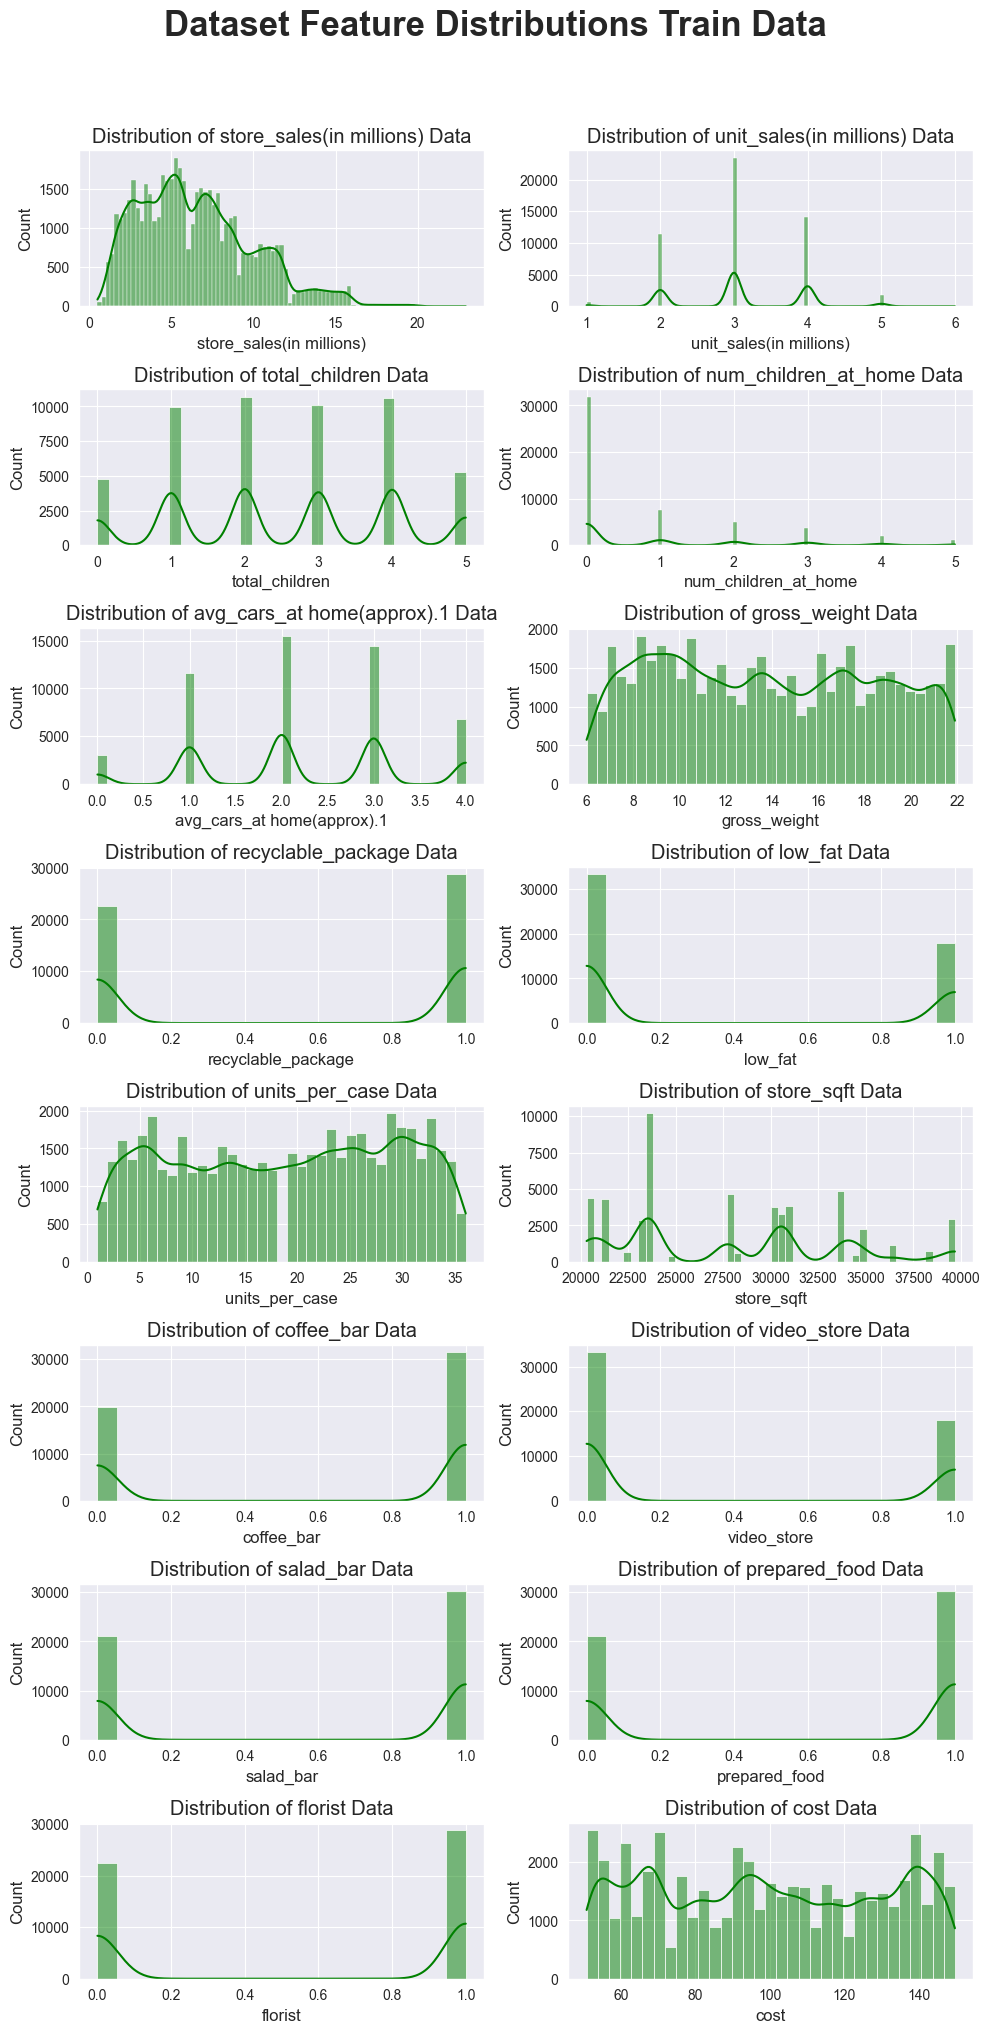

In [13]:
plt.figure(figsize=(10,30))
sns.set_style('darkgrid')
plt.suptitle(f'Dataset Feature Distributions Train Data\n\n\n', ha='center',  fontweight='bold', fontsize=25)
for i,col in enumerate(data_train_copy.columns,1):
    plt.subplot(12,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data_train_copy[col],kde=True, color="green")
    plt.tight_layout()
    plt.plot()
plt.show()


### Observations:

We can see that the distribution of our Cost feature (our target value) is not normally distributed but is not skewed either.

Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.


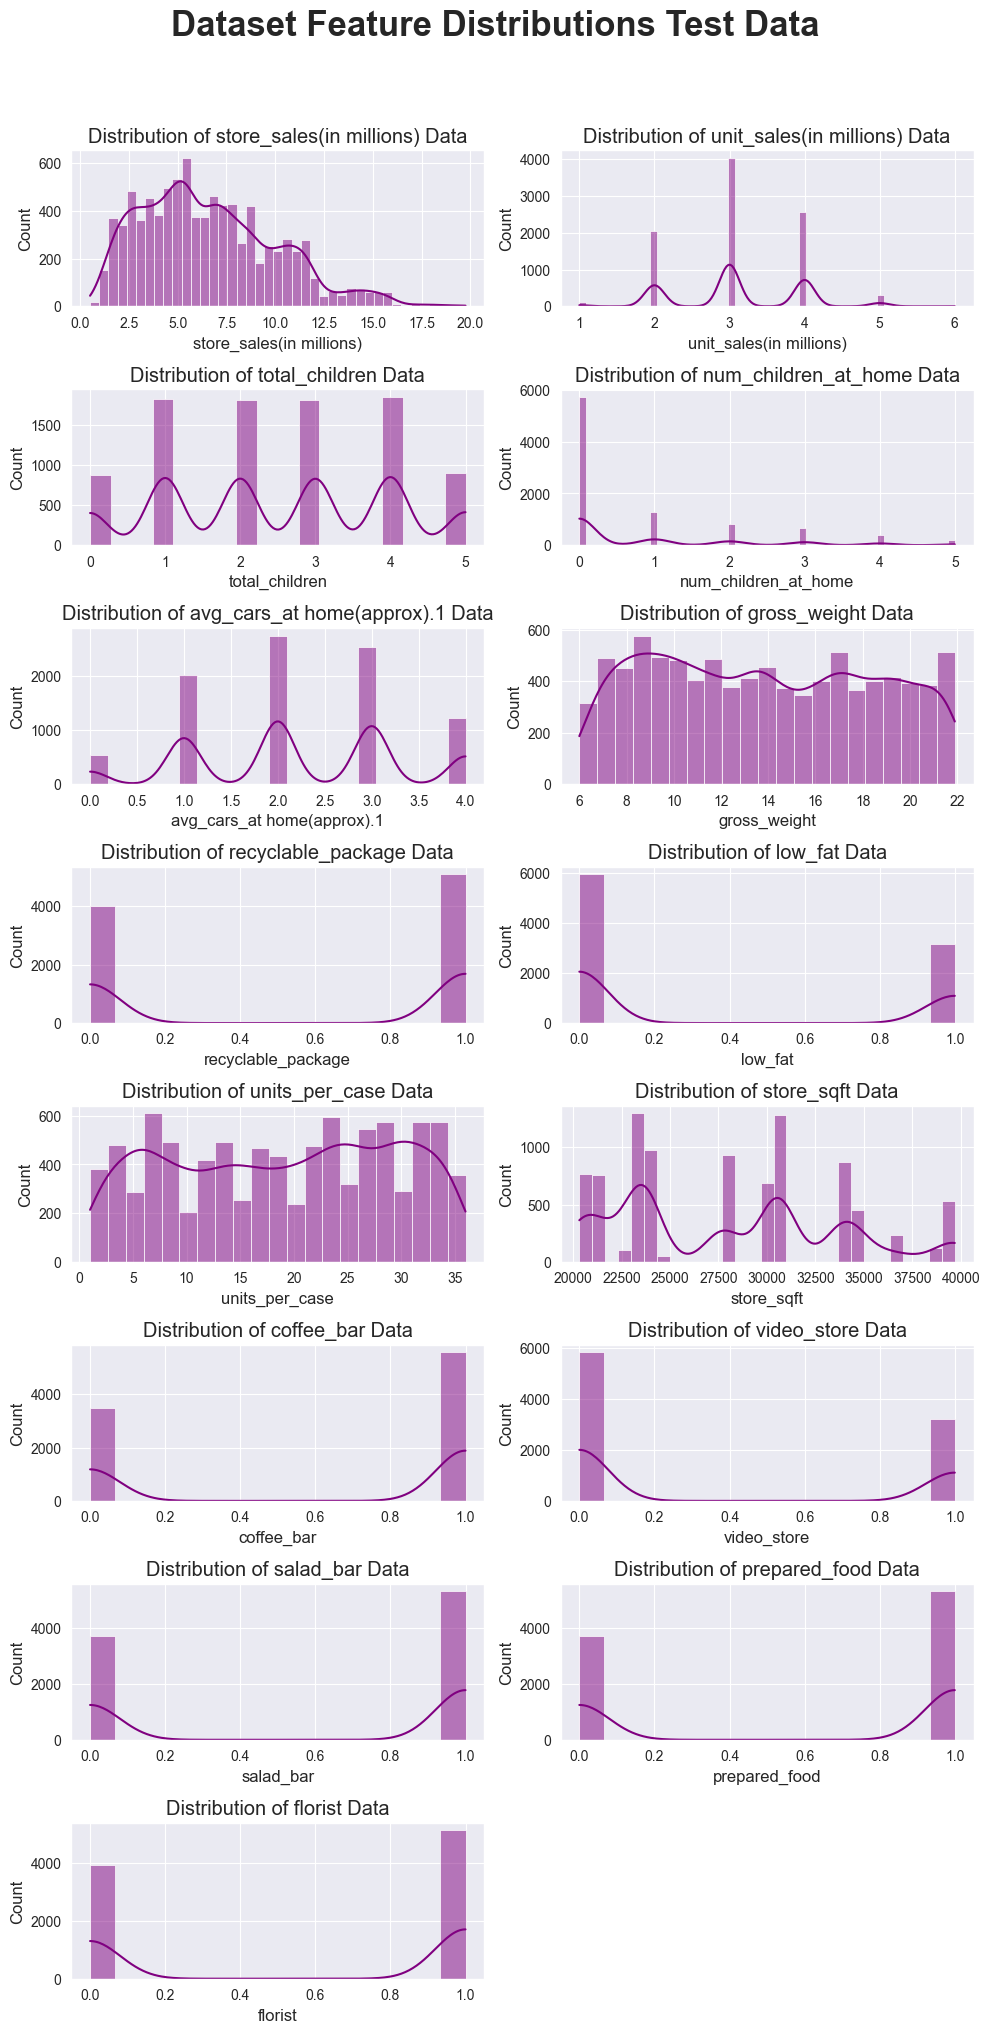

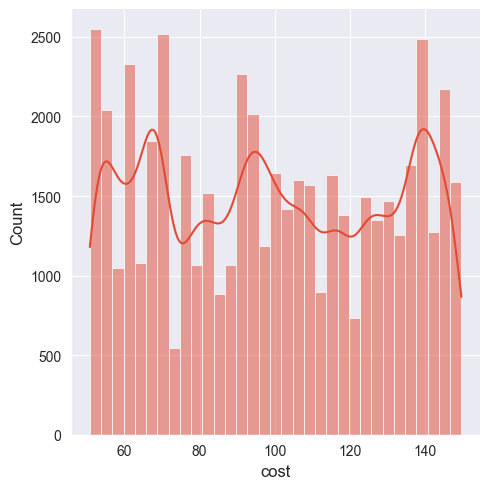

In [14]:
plt.figure(figsize=(10,30))
sns.set_style('darkgrid')
plt.suptitle(f'Dataset Feature Distributions Test Data\n\n\n', ha='center',  fontweight='bold', fontsize=25)
for i,col in enumerate(data_test.columns,1):
    plt.subplot(12,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data_test[col],kde=True, color='purple')
    plt.tight_layout()
    plt.plot()
plt.show()

sns.displot(data_train_copy, x="cost", kde=True)

### Observations:

If we observe both distributions from the train an test datasets we see minimal difference in distribution.

#### Graph distribution of quantitative data or numerical variables (BoxPlots)

As we can see from the various box plots there are virtually no outliers in our numerical variables except in our Store Sales feature.


Text(0, 0.5, 'count')

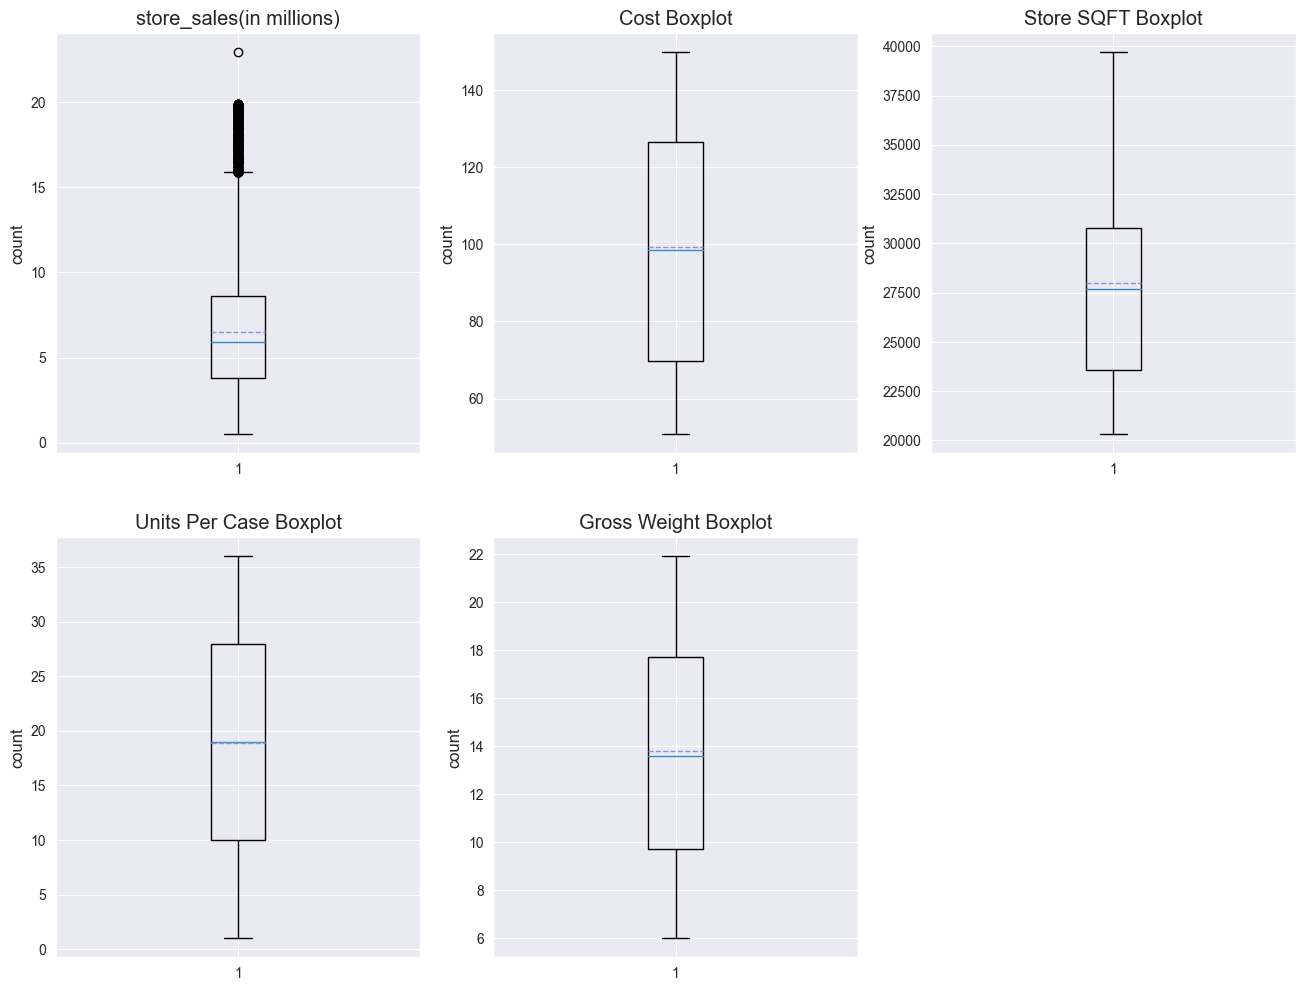

In [15]:
#graph distribution of quantitative data or numerical variables
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(x=data_train_copy['store_sales(in millions)'], showmeans = True, meanline = True)
plt.title('store_sales(in millions)')
plt.ylabel('count')

plt.subplot(232)
plt.boxplot(data_train_copy['cost'], showmeans = True, meanline = True)
plt.title('Cost Boxplot')
plt.ylabel('count')

plt.subplot(233)
plt.boxplot(data_train_copy['store_sqft'], showmeans = True, meanline = True)
plt.title('Store SQFT Boxplot')
plt.ylabel('count')

plt.subplot(234)
plt.boxplot(data_train_copy['units_per_case'], showmeans = True, meanline = True)
plt.title('Units Per Case Boxplot')
plt.ylabel('count')


plt.subplot(235)
plt.boxplot(data_train_copy['gross_weight'], showmeans = True, meanline = True)
plt.title('Gross Weight Boxplot')
plt.ylabel('count')


### Finding Correlations in our data and the Cost Feature

In [16]:
correlation_matrix = data_train_copy.corr()
correlation_matrix['cost'].sort_values(ascending=False)


cost                          1.000000
avg_cars_at home(approx).1    0.014183
low_fat                       0.005739
store_sales(in millions)     -0.002531
recyclable_package           -0.002936
gross_weight                 -0.002985
units_per_case               -0.003029
num_children_at_home         -0.005418
total_children               -0.006922
unit_sales(in millions)      -0.014592
store_sqft                   -0.037818
coffee_bar                   -0.061818
florist                      -0.089600
salad_bar                    -0.095439
prepared_food                -0.095439
video_store                  -0.110500
Name: cost, dtype: float64

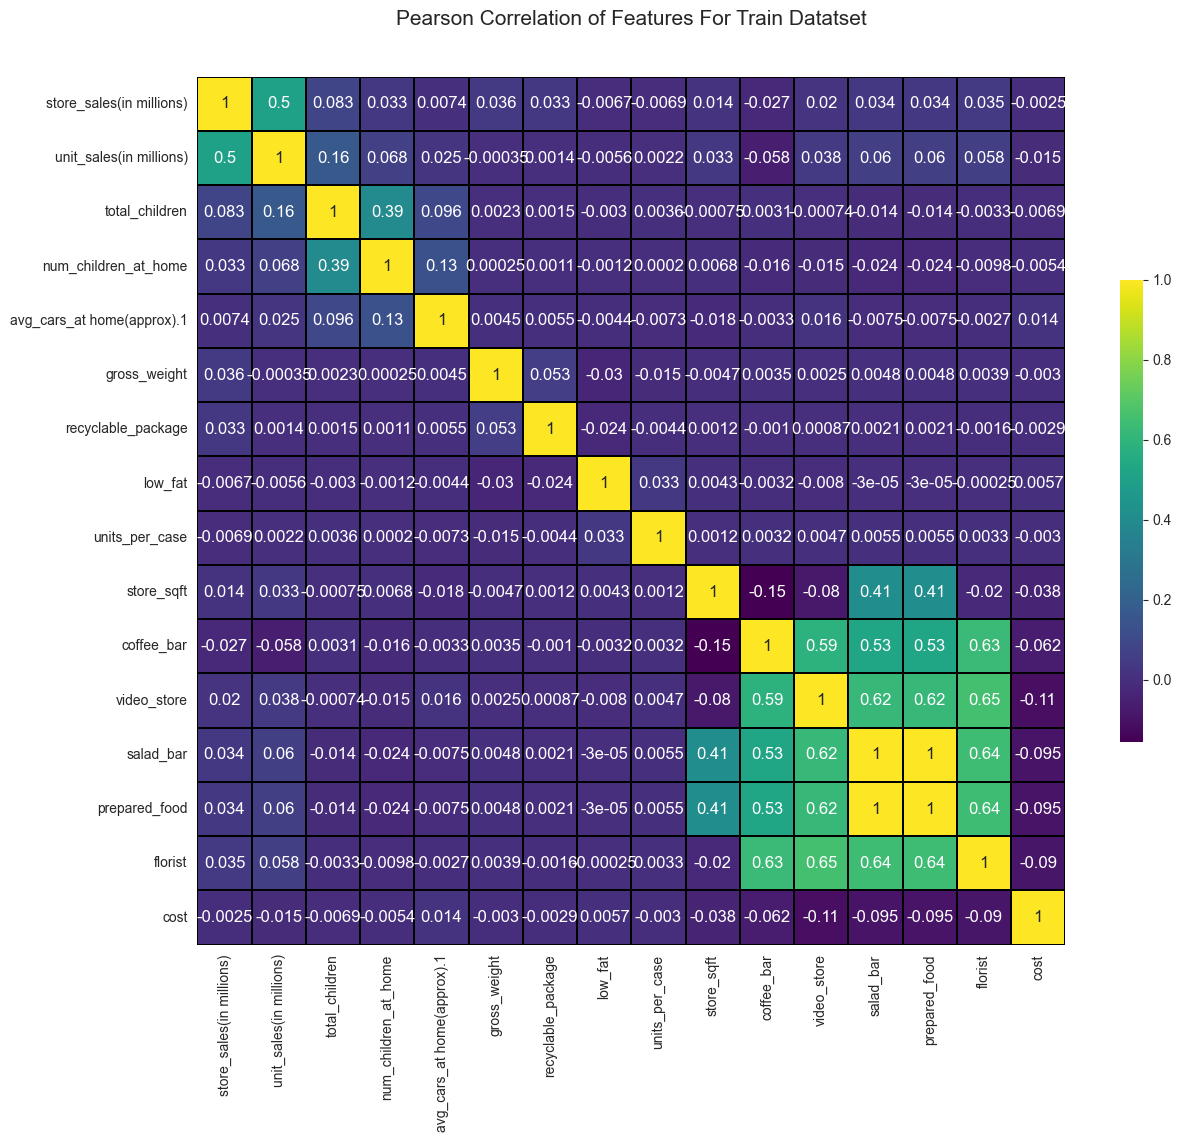

In [17]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data_train_copy.corr(), 
        cmap = "viridis",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features For Train Datatset', y=1.05, size=15)

correlation_heatmap(data_train_copy)

### Observations:

Firstly we can see that in both datasets our Dependent Variable `Cost` is not correlated to any other feature.

There is however a perfect correlation of (1) between `prepared_food` and `salad_bar`, we might want to drop one of these features in the feature engineering phase.



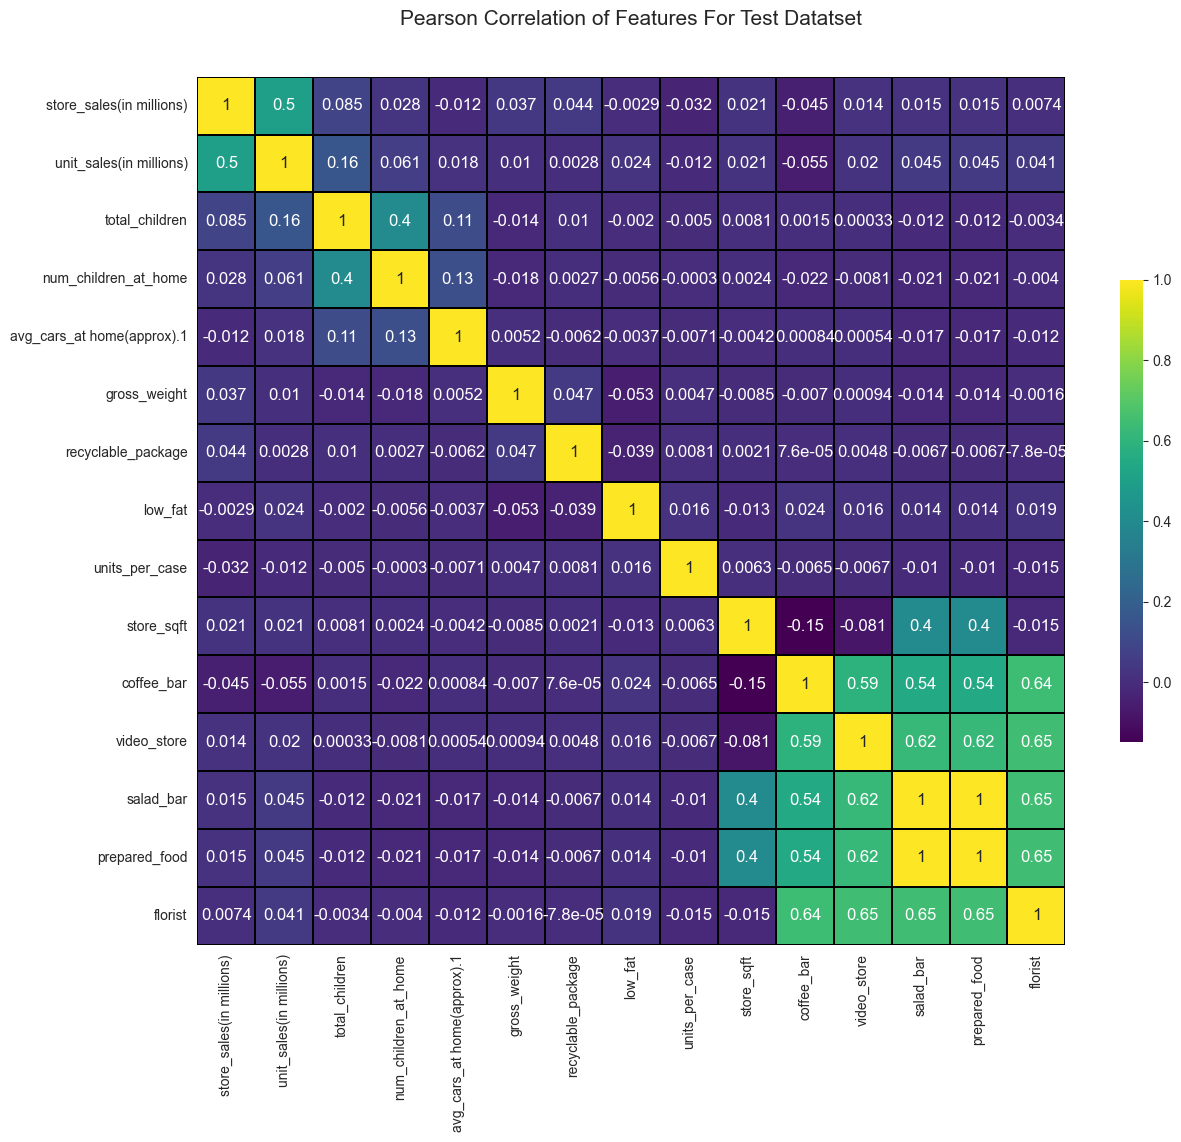

In [18]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data_test.corr(), 
        cmap = "viridis",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features For Test Datatset', y=1.05, size=15)

correlation_heatmap(data_test)